In [1]:
!pip install tensorflow
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
df = pd.read_csv("wdbc.data")
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
print(df.isnull().sum())
#dataset = dataset.dropna()

842302      0
M           0
17.99       0
10.38       0
122.8       0
1001        0
0.1184      0
0.2776      0
0.3001      0
0.1471      0
0.2419      0
0.07871     0
1.095       0
0.9053      0
8.589       0
153.4       0
0.006399    0
0.04904     0
0.05373     0
0.01587     0
0.03003     0
0.006193    0
25.38       0
17.33       0
184.6       0
2019        0
0.1622      0
0.6656      0
0.7119      0
0.2654      0
0.4601      0
0.1189      0
dtype: int64


In [5]:
df = df.rename(columns={'M':'LABEL'})
print(df.dtypes)

842302        int64
LABEL        object
17.99       float64
10.38       float64
122.8       float64
1001        float64
0.1184      float64
0.2776      float64
0.3001      float64
0.1471      float64
0.2419      float64
0.07871     float64
1.095       float64
0.9053      float64
8.589       float64
153.4       float64
0.006399    float64
0.04904     float64
0.05373     float64
0.01587     float64
0.03003     float64
0.006193    float64
25.38       float64
17.33       float64
184.6       float64
2019        float64
0.1622      float64
0.6656      float64
0.7119      float64
0.2654      float64
0.4601      float64
0.1189      float64
dtype: object


In [6]:
df = df.rename(columns={'842302':'ID'})
print(df.dtypes)

ID            int64
LABEL        object
17.99       float64
10.38       float64
122.8       float64
1001        float64
0.1184      float64
0.2776      float64
0.3001      float64
0.1471      float64
0.2419      float64
0.07871     float64
1.095       float64
0.9053      float64
8.589       float64
153.4       float64
0.006399    float64
0.04904     float64
0.05373     float64
0.01587     float64
0.03003     float64
0.006193    float64
25.38       float64
17.33       float64
184.6       float64
2019        float64
0.1622      float64
0.6656      float64
0.7119      float64
0.2654      float64
0.4601      float64
0.1189      float64
dtype: object


<Axes: xlabel='LABEL', ylabel='count'>

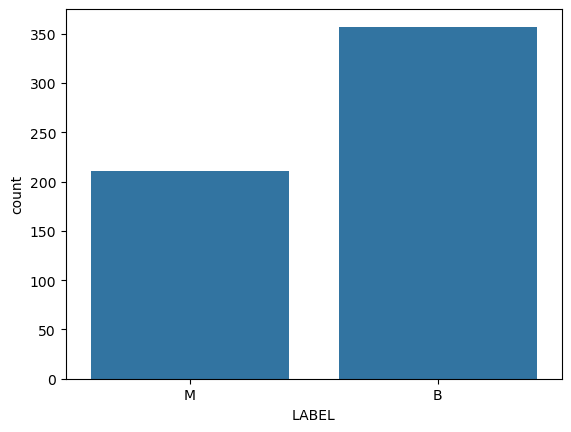

In [7]:
sns.countplot(x="LABEL", data=df) #M - malignant   B - benign

In [8]:
print("Distribution of data: ", df['LABEL'].value_counts())
y = df["LABEL"].values
print("Labels before encoding are: ", np.unique(y))
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  LABEL
B    357
M    211
Name: count, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [9]:
X = df.drop(labels = ["LABEL", "ID"], axis=1)
print(X.describe().T)

          count        mean         std         min         25%         50%  \
17.99     568.0   14.120491    3.523416    6.981000   11.697500   13.355000   
10.38     568.0   19.305335    4.288506    9.710000   16.177500   18.855000   
122.8     568.0   91.914754   24.285848   43.790000   75.135000   86.210000   
1001      568.0  654.279754  351.923751  143.500000  420.175000  548.750000   
0.1184    568.0    0.096321    0.014046    0.052630    0.086290    0.095865   
0.2776    568.0    0.104036    0.052355    0.019380    0.064815    0.092525   
0.3001    568.0    0.088427    0.079294    0.000000    0.029540    0.061400   
0.1471    568.0    0.048746    0.038617    0.000000    0.020310    0.033455   
0.2419    568.0    0.181055    0.027319    0.106000    0.161900    0.179200   
0.07871   568.0    0.062770    0.007035    0.049960    0.057697    0.061515   
1.095     568.0    0.403958    0.276038    0.111500    0.232375    0.323950   
0.9053    568.0    1.217402    0.551979    0.360200 

In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 [0.2100904  0.36083869 0.23350149 ... 0.88487973 1.         0.77371114]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (142, 30)


In [12]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

C:\Users\gsthe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.5587 - loss: 0.6673 - val_accuracy: 0.5915 - val_loss: 0.6618
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6338 - loss: 0.6583 - val_accuracy: 0.7183 - val_loss: 0.6520
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6808 - loss: 0.6453 - val_accuracy: 0.7394 - val_loss: 0.6433
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7535 - loss: 0.6320 - val_accuracy: 0.7746 - val_loss: 0.6349
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7653 - loss: 0.6218 - val_accuracy: 0.7746 - val_loss: 0.6260
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7864 - loss: 0.6104 - val_accuracy: 0.7887 - val_loss: 0.6146
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8099 - loss: 0.5964 - val_accuracy: 0.8028 - val_loss: 0.6006
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8239 - loss: 0.5746 - val_accuracy: 0.8028 - val_loss

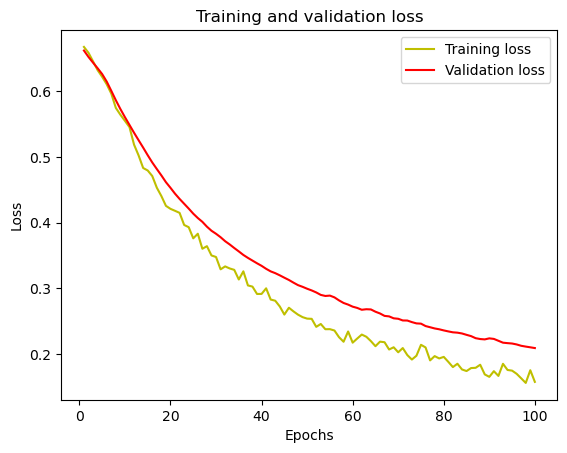

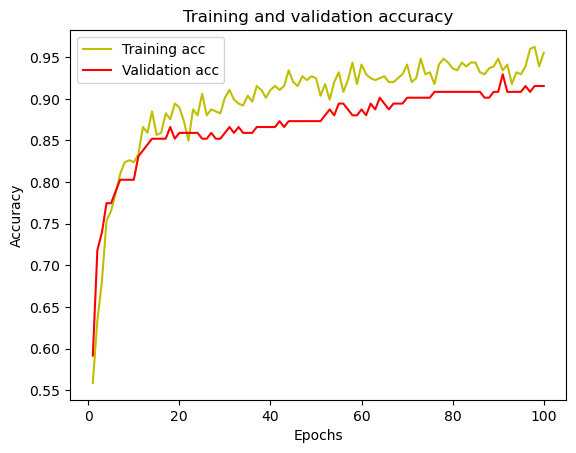

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Convert model predictions (probabilities) into binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)


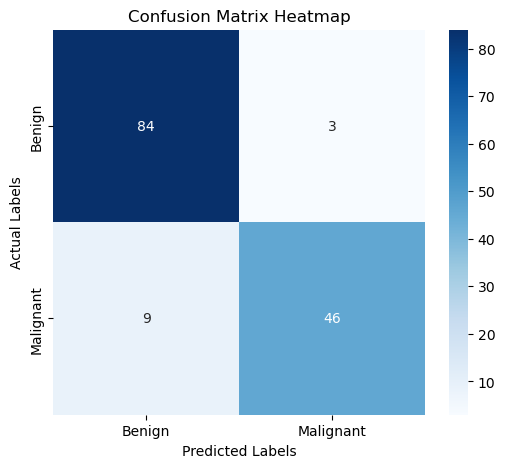

In [25]:
#HEAT MAP ANALYSIS OUTPUT


from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[84  3]
 [ 9 46]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        87
           1       0.94      0.84      0.88        55

    accuracy                           0.92       142
   macro avg       0.92      0.90      0.91       142
weighted avg       0.92      0.92      0.91       142



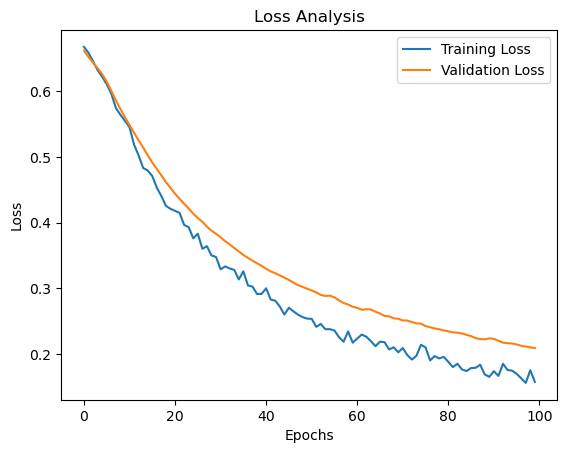

Training Loss: 0.1578
Testing Loss: 0.2093


In [18]:
#LOSS ANALYSIS OUTPUT

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Analysis')
plt.show()

# Extract final training and validation loss values
training_loss = history.history['loss'][-1]  # Last epoch training loss
testing_loss = history.history['val_loss'][-1]  # Last epoch validation loss

# Print the loss values
print(f"Training Loss: {training_loss:.4f}")
print(f"Testing Loss: {testing_loss:.4f}")

In [19]:
#ACCURACY


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9155


In [20]:
#PRECISION

from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9388


In [21]:
#RECALL

from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.8364


In [22]:
#F1 SCORE

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.8846


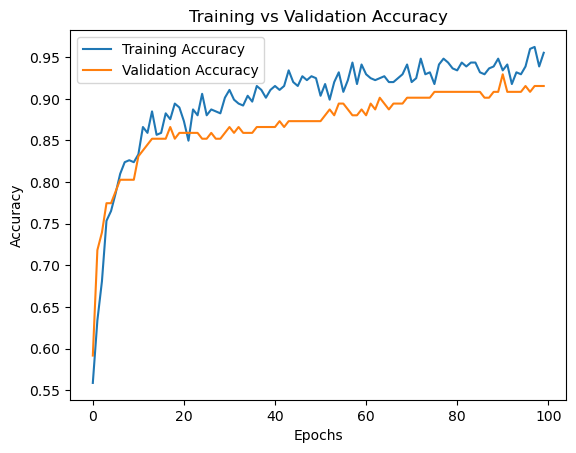

Training Accuracy: 0.9554
Testing Accuracy: 0.9155


In [23]:
#TRAINING AND TESTING ACCURACY

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


# Extract final training and validation accuracy values
training_accuracy = history.history['accuracy'][-1]  # Last epoch training accuracy
testing_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

# Print the accuracy values
print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")